# Assignment - implement a boosting model for regression (45)

The goal is to implement a boosted model, using `DecisionTreeRegressor` as base estimator and the algorithm discussed in class. Once we know how to code a boosted model we will investigate the effect of changing the learning rate and the complexity of the base estimator.

Note: The only sklearn estimator you may use in this assignment is `DecisionTreeRegressor`, in particular, do not directly train an sklearn boosting algorithm. The point is to build it yourself.

We begin with standard imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('housing2024.csv')
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
7995,17995,-121.98,37.29,33.0,2120.0,349.0,907.0,336.0,7.5443,283000.0,<1H OCEAN
7996,17996,-121.98,37.29,31.0,2750.0,664.0,1459.0,660.0,3.2287,264900.0,<1H OCEAN
7997,17997,-121.96,37.28,33.0,1940.0,327.0,877.0,314.0,5.4386,280400.0,<1H OCEAN
7998,17998,-121.97,37.28,25.0,4707.0,695.0,1995.0,642.0,6.6437,296100.0,<1H OCEAN


We perform the same preprocessing steps as in the previous assignment

In [3]:
total_bedrooms_median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(value=total_bedrooms_median, inplace=True)
ocean_dummies = pd.get_dummies(df.ocean_proximity, )
df.drop(labels="ocean_proximity", axis=1, inplace=True)
df = df.join(ocean_dummies)

Now split into training and testing sets.

In [4]:
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Implement a boosted model (25)

Now complete the function below to implement the boosted model discussed in class and in Algorithm 8.2 on p. 349 of *Introduction to Statistical Learning with Python*. You should make two modifications to the Algorithm 8.2:

1.  Instead of controlling the tree complexity via the number of splits in the tree, use the `max_depth` parameter;
2.   It will be useful to keep track of the test set MSE in each iteration - you may use the empty list `mse_test` for this purpose.

The function takes as input the training and test sets as well as relevant parameter values.
The function should return two things, the final boosting model's predictions on the test set (`boosted_predictions_test`) and a list of the test MSEs for each iteration of the algorithm (in `mse_test`).

I provide an outline and default parameter values for the learning rate, number of trees and maximum tree depth to get started. (15 points)



In [5]:
def boosting(X_train, y_train, X_test, y_test, learning_rate=0.5, num_trees=100, max_depth=1):

  boosted_predictions_train = np.zeros(y_train.shape)
  boosted_predictions_test = np.zeros(y_test.shape)

  mse_test = []

  # your algorithm here
  for _ in range(num_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X_train, y_train - boosted_predictions_train)
        boosted_predictions_train += learning_rate * tree.predict(X_train)
        boosted_predictions_test += learning_rate * tree.predict(X_test)
        mse = mean_squared_error(y_test, boosted_predictions_test)
        mse_test.append(mse)
  return boosted_predictions_test, mse_test

Call your implemented function with the default parameter values, then create two plots (5 points each):


1.   A line plot showing Test MSE as a function of the number of trees in the boosted model
2.   A scatterplot of the actual y-values compared to the boosted model's predictions.



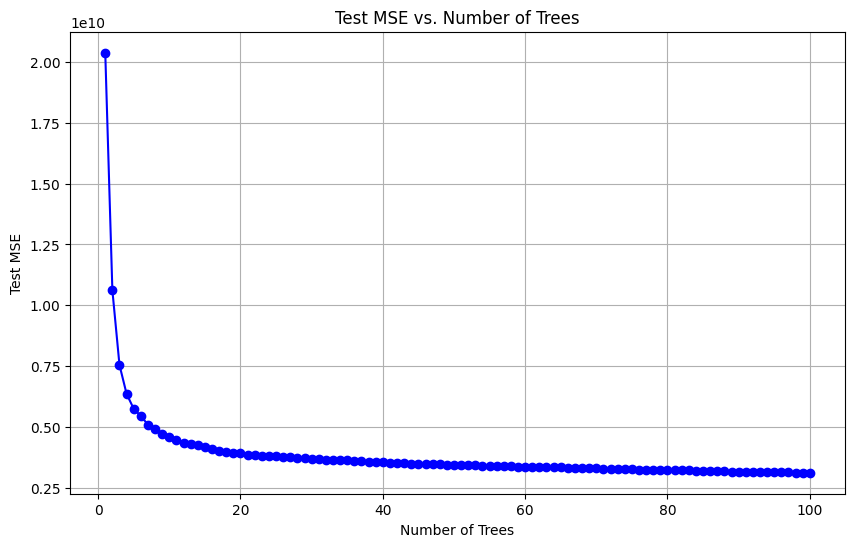

In [6]:
boosted_predictions_test, mse_test = boosting(X_train, y_train, X_test, y_test)
# your code here
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), mse_test, marker='o', linestyle='-', color='blue')
plt.title('Test MSE vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Test MSE')
plt.grid(True)
plt.show()

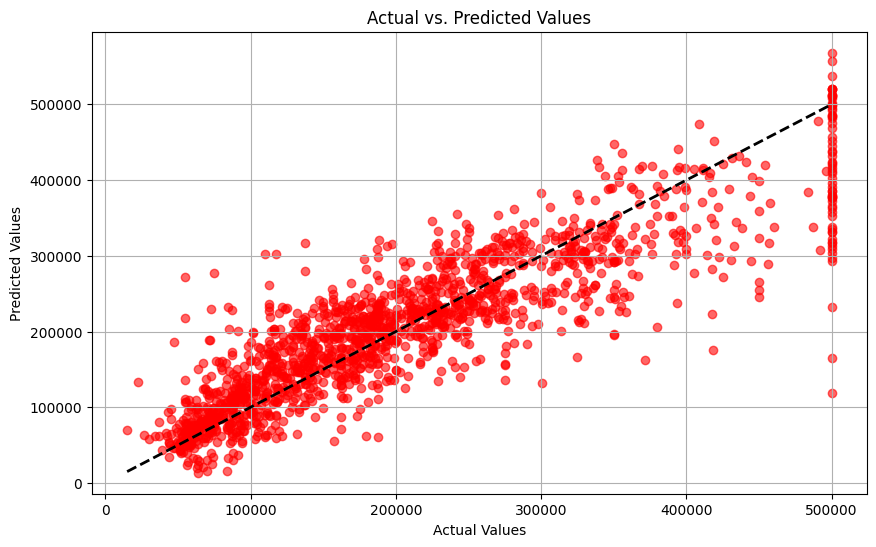

In [7]:
# your code here
plt.figure(figsize=(10, 6))
plt.scatter(y_test, boosted_predictions_test, alpha=0.6, color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.grid(True)
plt.show()

## Effect of learning rate (8)

Use the function you implemented above to build a boosted model for each of the learning rates below and visualize the test MSE of each of the model across iterations. Keep max_depth fixed.

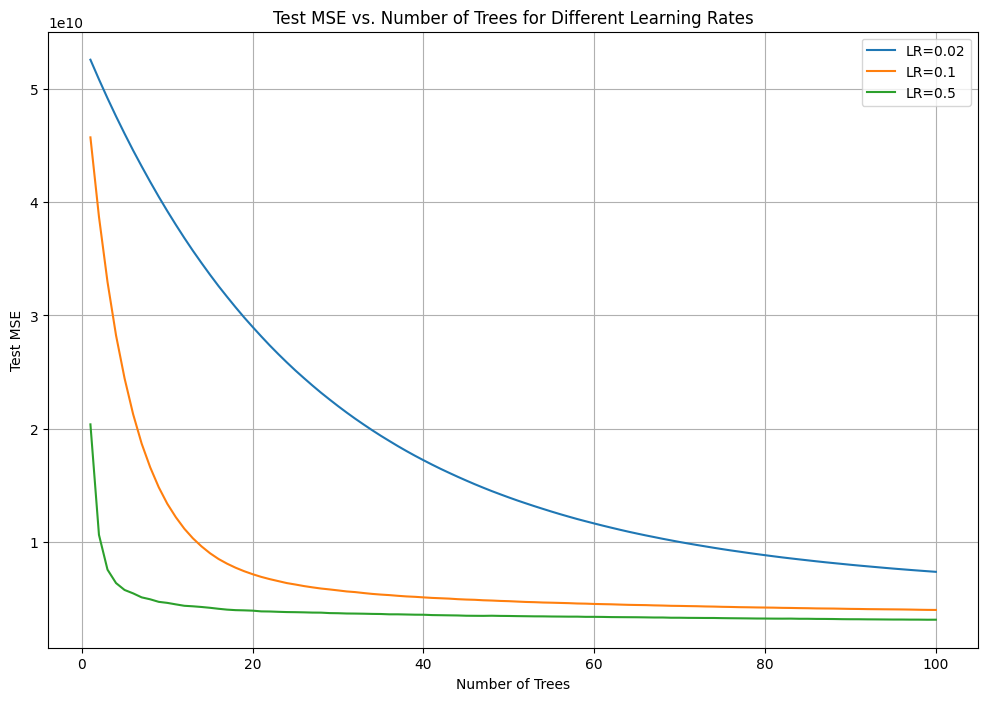

In [8]:
learning_rates = [0.02, 0.1, 0.5]
num_trees = 100
max_depth = 1

# your code here (5 points for models, 3 points for plotting)

# Dictionary to hold the mse_test values for each learning rate
mse_tests = {}

# Build a boosted model for each of the specified learning rates
for lr in learning_rates:
    _, mse_test_lr = boosting(X_train, y_train, X_test, y_test, learning_rate=lr, num_trees=num_trees, max_depth=max_depth)
    mse_tests[lr] = mse_test_lr
plt.figure(figsize=(12, 8))
for lr, mse in mse_tests.items():
    plt.plot(range(1, num_trees + 1), mse, linestyle='-', label=f'LR={lr}')

plt.title('Test MSE vs. Number of Trees for Different Learning Rates')
plt.xlabel('Number of Trees')
plt.ylabel('Test MSE')
plt.legend()
plt.grid(True)
plt.show()

## Effect of tree depth (8)

Use the function you implemented above to build a boosted model for each of the tree depths (of the base estimator) below. Visualize how test MSE is changes across iterations for each of the parameter values.

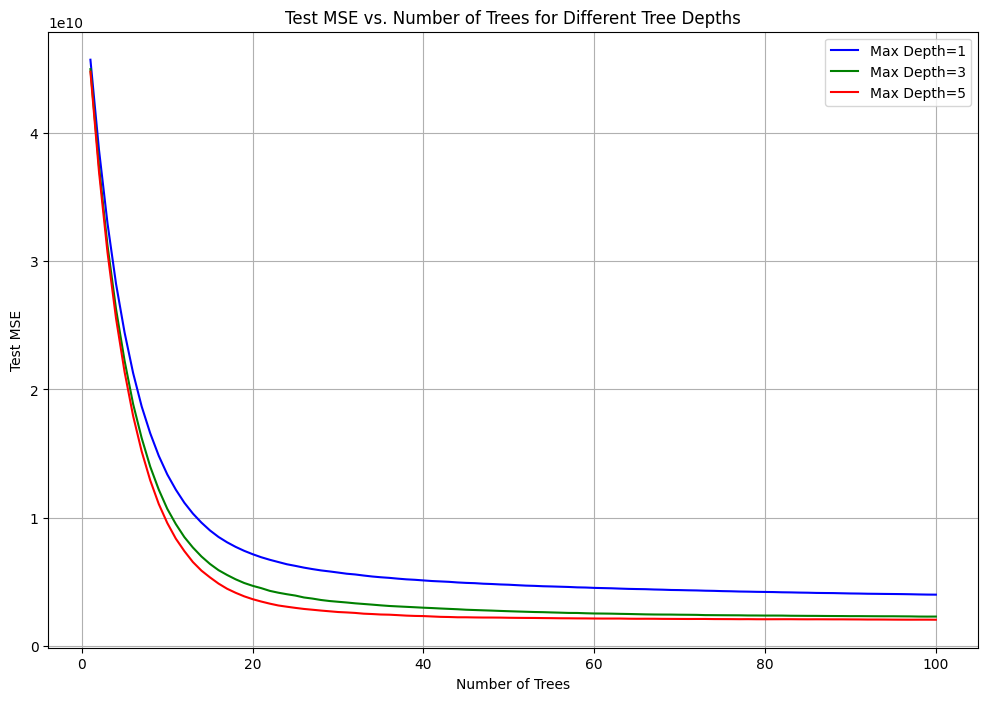

In [9]:
learning_rate = 0.1
num_trees = 100
max_depths = [1, 3, 5]

# your code here
# Dictionary to hold the mse_test values for each max_depth
mse_tests_depth = {}

# Build a boosted model for each of the specified max_depths
for depth in max_depths:
    _, mse_test_depth = boosting(X_train, y_train, X_test, y_test, learning_rate=learning_rate, num_trees=num_trees, max_depth=depth)
    mse_tests_depth[depth] = mse_test_depth

colors = ['blue', 'green', 'red']  # Colors for the lines
plt.figure(figsize=(12, 8))
for (depth, mse), color in zip(mse_tests_depth.items(), colors):
    plt.plot(range(1, num_trees + 1), mse, color=color, linestyle='-', label=f'Max Depth={depth}')

plt.title('Test MSE vs. Number of Trees for Different Tree Depths')
plt.xlabel('Number of Trees')
plt.ylabel('Test MSE')
plt.legend()
plt.grid(True)
plt.show()

## 5.  Collaboration statement (4)

Include the names of everyone that helped you with this homework and explain how each person helped. Also include the names of everyone you helped, and explain how. If you worked on your own, write this. If you leave this blank you will not get points.
Asking for guidance is perfectly fine, but please do not ask for or  share exact solutions.

*Answer*

## No Collaboration, worked by myself.

Create a pdf of this notebooka and submit it on gradescope. See assignment 2 if you need further instructions on submitting.